In [1]:
import os
aws_access_key_id= os.environ['aws_access_key_id']
aws_secret_access_key = os.environ['aws_secret_access_key']

In [3]:
import boto3

In [4]:
client=boto3.client('rekognition', region_name='us-east-1', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [22]:
image = open("image.jpg", "rb")

In [23]:
response = client.recognize_celebrities(Image={'Bytes':image.read()})

In [24]:
response

{'CelebrityFaces': [{'Urls': ['www.imdb.com/name/nm1682433'],
   'Name': 'Barack Obama',
   'Id': '3R3sg9u',
   'Face': {'BoundingBox': {'Width': 0.5519999861717224,
     'Height': 0.40528634190559387,
     'Left': 0.3240000009536743,
     'Top': 0.19530102610588074},
    'Confidence': 99.99652862548828,
    'Landmarks': [{'Type': 'eyeLeft',
      'X': 0.5077553391456604,
      'Y': 0.351651668548584},
     {'Type': 'eyeRight', 'X': 0.6877167820930481, 'Y': 0.34554171562194824},
     {'Type': 'nose', 'X': 0.5916082859039307, 'Y': 0.42447274923324585},
     {'Type': 'mouthLeft', 'X': 0.5185824632644653, 'Y': 0.49297988414764404},
     {'Type': 'mouthRight',
      'X': 0.6812101006507874,
      'Y': 0.48626968264579773}],
    'Pose': {'Roll': -2.83101224899292,
     'Yaw': -3.9226083755493164,
     'Pitch': 1.9613521099090576},
    'Quality': {'Brightness': 88.326171875, 'Sharpness': 97.46806335449219}},
   'MatchConfidence': 100.0}],
 'UnrecognizedFaces': [],
 'OrientationCorrection': '

In [25]:
for celebrity in response['CelebrityFaces']:
        print ('Name: ' + celebrity['Name'])
        print ('Id: ' + celebrity['Id'])
        print ('Position:')
        print ('   Left: ' + '{:.2f}'.format(celebrity['Face']['BoundingBox']['Height']))
        print ('   Top: ' + '{:.2f}'.format(celebrity['Face']['BoundingBox']['Top']))
        print ('Info')
        for url in celebrity['Urls']:
            print ('   ' + url)

Name: Barack Obama
Id: 3R3sg9u
Position:
   Left: 0.41
   Top: 0.20
Info
   www.imdb.com/name/nm1682433


In [26]:
celeb = response['CelebrityFaces'][0]['Face']['BoundingBox']

In [27]:
print(celeb)

{'Width': 0.5519999861717224, 'Height': 0.40528634190559387, 'Left': 0.3240000009536743, 'Top': 0.19530102610588074}


In [39]:
from PIL import Image, ImageDraw
from IPython.display import display

In [40]:
im=Image.open('image.jpg')

In [41]:
w, h = im.size

In [42]:
x1 = (celeb["Left"])*w
y1 = (celeb["Top"])*h

x2 = (celeb["Left"] + celeb["Width"])*w
y2 = (celeb["Top"] + celeb["Height"])*h

In [43]:
box=[(x1,y1),(x2,y2)]

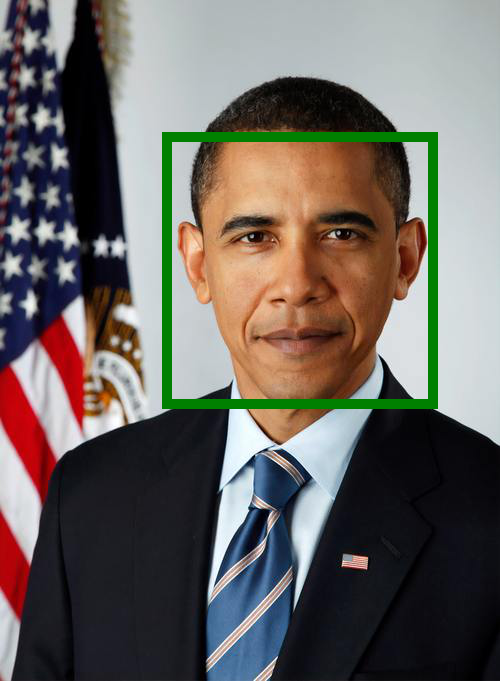

In [51]:
im1 = ImageDraw.Draw(im)   

im1.rectangle(box, outline ="green", width=10) 
display(im)